### Diabetic Retinopathy Detection

In [1]:
# Library import
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import random,os
import shutil
import matplotlib.pyplot as plt
from matplotlib.image import imread
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import categorical_accuracy
from sklearn.model_selection import train_test_split

print("Tensorflow_Version:",tf.__version__)

Tensorflow_Version: 2.13.0


In [2]:
def New_Features_in_csv(input=None) -> None:

    '''New features Generation & Mapping the output features'''

    if input == None:
        input = r'/Users/Sarmita Majumdar/Desktop/SMit_App/train.csv'  # Loading Data

    
    data = pd.read_csv(input)
    print(data.head())

    Defect_binary = {
        0:'No_DR',
        1: 'DR',
        2: 'DR',
        3: 'DR',
        4: 'DR'
    }

    diagnosis_all_dict = {
        0:'No_DR',
        1: 'Mild',
        2: 'Moderate',
        3: 'Severe',
        4: 'Proliferate_DR',
    }

    data['binary_type'] = data['diagnosis'].map(Defect_binary.get)
    data['type'] = data['diagnosis'].map(diagnosis_all_dict.get)
    
    return data


New_Features_in_csv()

print(New_Features_in_csv.__doc__)

        id_code  diagnosis
0  000c1434d8d7          2
1  001639a390f0          4
2  0024cdab0c1e          1
3  002c21358ce6          0
4  005b95c28852          0
New features Generation & Mapping the output features


        id_code  diagnosis
0  000c1434d8d7          2
1  001639a390f0          4
2  0024cdab0c1e          1
3  002c21358ce6          0
4  005b95c28852          0
Information about the data: <bound method DataFrame.info of            id_code  diagnosis binary_type            type
0     000c1434d8d7          2          DR        Moderate
1     001639a390f0          4          DR  Proliferate_DR
2     0024cdab0c1e          1          DR            Mild
3     002c21358ce6          0       No_DR           No_DR
4     005b95c28852          0       No_DR           No_DR
...            ...        ...         ...             ...
3657  ffa47f6a7bf4          2          DR        Moderate
3658  ffc04fed30e6          0       No_DR           No_DR
3659  ffcf7b45f213          2          DR        Moderate
3660  ffd97f8cd5aa          0       No_DR           No_DR
3661  ffec9a18a3ce          2          DR        Moderate

[3662 rows x 4 columns]>


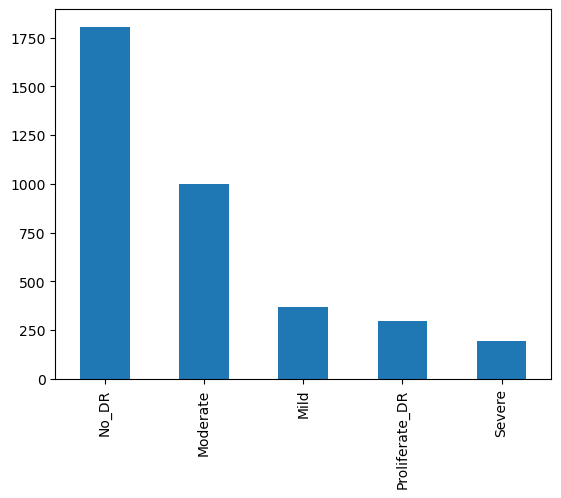

In [3]:
def data_type_EDA() -> None:
    
    """Only analysis the Data in retina diabetic type identification"""
    
    data = New_Features_in_csv()
    print("Information about the data:",data.info)
    data['type'].value_counts().plot(kind = 'bar')
        
data_type_EDA()

        id_code  diagnosis
0  000c1434d8d7          2
1  001639a390f0          4
2  0024cdab0c1e          1
3  002c21358ce6          0
4  005b95c28852          0
Describe the data: <bound method NDFrame.describe of            id_code  diagnosis binary_type            type
0     000c1434d8d7          2          DR        Moderate
1     001639a390f0          4          DR  Proliferate_DR
2     0024cdab0c1e          1          DR            Mild
3     002c21358ce6          0       No_DR           No_DR
4     005b95c28852          0       No_DR           No_DR
...            ...        ...         ...             ...
3657  ffa47f6a7bf4          2          DR        Moderate
3658  ffc04fed30e6          0       No_DR           No_DR
3659  ffcf7b45f213          2          DR        Moderate
3660  ffd97f8cd5aa          0       No_DR           No_DR
3661  ffec9a18a3ce          2          DR        Moderate

[3662 rows x 4 columns]>


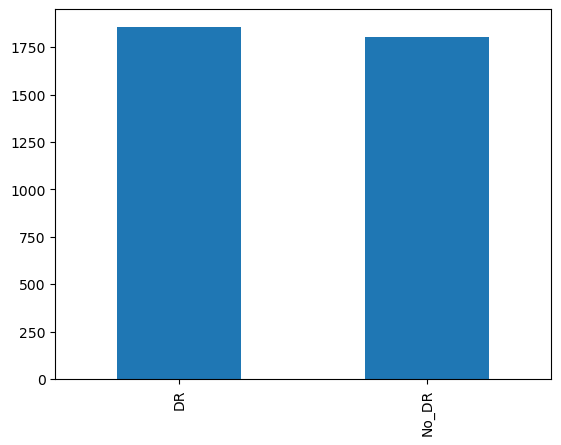

In [4]:
def data_binary_type_EDA() -> None:
    
    """Only analysis the Data in retina diabetic binary type identification"""
    
    data = New_Features_in_csv()
    print("Describe the data:",data.describe)
    data['binary_type'].value_counts().plot(kind='bar')
    
data_binary_type_EDA()

In [5]:
#Split the data

def data_separation()-> None:
    '''Train_Test_Separation'''
    data = New_Features_in_csv()
    train,val = train_test_split(data,test_size=0.2,stratify = data['type'])
    train,test = train_test_split(train,test_size = 0.15/(1-0.15), stratify=train['type'])
    
    #print(train['type'].value_counts(), '\n')
    #print(test['type'].value_counts(), '\n')
    #print(val['type'].value_counts(), '\n')
    
    return train,val,test

data_separation()

        id_code  diagnosis
0  000c1434d8d7          2
1  001639a390f0          4
2  0024cdab0c1e          1
3  002c21358ce6          0
4  005b95c28852          0


(           id_code  diagnosis binary_type            type
 781   382752f6694a          1          DR            Mild
 1674  76b950c6ed5e          0       No_DR           No_DR
 3405  ec57cc20d776          0       No_DR           No_DR
 1408  62ab144d5cee          2          DR        Moderate
 2908  ca2b54b95ade          0       No_DR           No_DR
 ...            ...        ...         ...             ...
 1296  5a11d21c2828          2          DR        Moderate
 3411  ed2c06fcc573          2          DR        Moderate
 2932  cb547e723a16          4          DR  Proliferate_DR
 521   253e96488cfb          0       No_DR           No_DR
 513   24b87f744598          3          DR          Severe
 
 [2412 rows x 4 columns],
            id_code  diagnosis binary_type            type
 1092  4d7d6928534a          1          DR            Mild
 638   2cfe8703f265          0       No_DR           No_DR
 930   435d900fa7b2          2          DR        Moderate
 2166  9878db94d9f3         

In [6]:
#Create working directory

def makedir_separate_images() -> None:
    '''
    1. Initiate the data
    2. Create Train,Test,val directory
    3. Separate train,test,val copy the images 
    '''
    
    train,val,test = data_separation()
    
    base_dir = ''
    
    train_dir = os.path.join(base_dir, 'train')
    val_dir = os.path.join(base_dir, 'val')
    test_dir = os.path.join(base_dir, 'test')
    
    if os.path.exists(base_dir):
        shutil.rmtree(base_dir)
        
    if os.path.exists(train_dir):
        shutil.rmtree(train_dir)
    os.makedirs(train_dir)
    
    if os.path.exists(val_dir):
        shutil.rmtree(val_dir)
    os.makedirs(val_dir)
    
    if os.path.exists(test_dir):
        shutil.rmtree(test_dir)
    os.makedirs(test_dir)
    
    #Copy images to respective working train,test,val directory
    
    src_dir = r'/Users/Sarmita Majumdar/Desktop/SMit_App/Archive/Gaussian-Images-Filtered'
    
    for index,row in train.iterrows():
        
        diagnosis = row['type']
        binary_diagnosis = row['binary_type']
        id_code = row['id_code'] + ".png"
        srcfile = os.path.join(src_dir, diagnosis, id_code)
        dstfile = os.path.join(train_dir,binary_diagnosis)
        os.makedirs(dstfile, exist_ok=True)
        shutil.copy(srcfile,dstfile)
        
    for index,row in val.iterrows():
        
        diagnosis = row['type']
        binary_diagnosis = row['binary_type']
        id_code = row['id_code'] + ".png"
        srcfile = os.path.join(src_dir, diagnosis, id_code)
        dstfile = os.path.join(val_dir,binary_diagnosis)
        os.makedirs(dstfile, exist_ok=True)
        shutil.copy(srcfile,dstfile)
        
    for index,row in test.iterrows():
        
        diagnosis = row['type']
        binary_diagnosis = row['binary_type']
        id_code = row['id_code'] + ".png"
        srcfile = os.path.join(src_dir, diagnosis, id_code)
        dstfile = os.path.join(test_dir,binary_diagnosis)
        os.makedirs(dstfile, exist_ok=True)
        shutil.copy(srcfile,dstfile)
        
    return train,val,test
        
makedir_separate_images()
print(makedir_separate_images.__doc__)

        id_code  diagnosis
0  000c1434d8d7          2
1  001639a390f0          4
2  0024cdab0c1e          1
3  002c21358ce6          0
4  005b95c28852          0

    1. Initiate the data
    2. Create Train,Test,val directory
    3. Separate train,test,val copy the images 
    


In [7]:
def ImageDataGenerator_Data():
    
    '''
    Steps:
    
    1. Separate images - Train, Test, Val
    2. Train, Test, Val is copy th images
    3. ImageDataGenerator: ImageScaling, rescale
    
    '''
    
    train,val,test = makedir_separate_images()
    
    train_path = 'train'
    val_path = 'val'
    test_path = 'test'
    
    train_batches = ImageDataGenerator(rescale=1/255.).flow_from_directory(train_path, target_size=(224,224), shuffle=True)
    val_batches = ImageDataGenerator(rescale=1/255.).flow_from_directory(val_path, target_size=(224,224), shuffle=True)
    test_batches = ImageDataGenerator(rescale=1/255.).flow_from_directory(test_path,target_size=(224,224), shuffle=True)
    
    #print(train_batches)
    #print(val_batches)
    #print(test_batches)
    
    return train_batches,val_batches,test_batches
    
ImageDataGenerator_Data()
print(ImageDataGenerator_Data.__doc__)

        id_code  diagnosis
0  000c1434d8d7          2
1  001639a390f0          4
2  0024cdab0c1e          1
3  002c21358ce6          0
4  005b95c28852          0
Found 2412 images belonging to 2 classes.
Found 733 images belonging to 2 classes.
Found 517 images belonging to 2 classes.

    Steps:
    
    1. Separate images - Train, Test, Val
    2. Train, Test, Val is copy th images
    3. ImageDataGenerator: ImageScaling, rescale
    
    


In [8]:
#Building the model

def Model() -> None:
    
    '''Building CNN model + Compile + EarlyStopping + Fit '''
    
    model = tf.keras.Sequential([
        
        layers.Conv2D(8, (3,3), padding="valid", input_shape=(224,224,3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.BatchNormalization(),
        
        layers.Conv2D(16,(3,3), padding="valid",activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.BatchNormalization(),
        
        layers.Conv2D(32,(4,4),padding="valid",activation='relu'),
        layers.MaxPooling2D(pool_size = (2,2)),
        layers.BatchNormalization(),
        
        layers.Flatten(),
        layers.Dense(32,activation='relu'),
        layers.Dropout(0.15),
        layers.Dense(2,activation='softmax')
        
    ])
    
    #Compile
    
    model.compile(optimizer = tf.keras.optimizers.Adam(lr=1e-5),
                 loss = tf.keras.losses.BinaryCrossentropy(),
                 metrics=['acc'])
    
    #Earlystopping
    
    es = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta=0,
        patience=0,
        verbose=0,
        mode='auto',
    )
    
    es1 = keras.callbacks.ModelCheckpoint(r'/Users/Sarmita Majumdar/Desktop/SMit_App/WebApp-Diabetic-Retino/models_epoch/model{epoch:08d}-{acc}.h5', period=1)
    
    #call the imagedatagenerator function
    train_batches,val_batches,test_batches = ImageDataGenerator_Data()
    
    
    history = model.fit(train_batches, epochs=2, validation_data=val_batches,callbacks=[es,es1])
    
    #accuracy
    loss,acc = model.evaluate_generator(test_batches,verbose=1)
    
    print("Accuracy",acc)
    print("loss",loss)
    
    model.save('retina_model.h5')
    
    return loss,acc,model

In [9]:
#Train the model

def train_model() -> None:
    
    '''train the model'''
    history = Model()

    
    return history
    
train_model()

        id_code  diagnosis
0  000c1434d8d7          2
1  001639a390f0          4
2  0024cdab0c1e          1
3  002c21358ce6          0
4  005b95c28852          0
Found 2412 images belonging to 2 classes.
Found 733 images belonging to 2 classes.
Found 517 images belonging to 2 classes.
Epoch 1/2
76/76 [==============================] - 84s 1s/step - loss: 0.3721 - acc: 0.8852 - val_loss: 0.6639 - val_acc: 0.5471
Epoch 2/2


C:\Users\Sarmita Majumdar\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


76/76 [==============================] - 82s 1s/step - loss: 0.2265 - acc: 0.9158 - val_loss: 2.2157 - val_acc: 0.5075


C:\Users\Sarmita Majumdar\AppData\Local\Temp\ipykernel_10872\2519114199.py:53: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss,acc = model.evaluate_generator(test_batches,verbose=1)


17/17 [==============================] - 6s 361ms/step - loss: 2.2561 - acc: 0.5068
Accuracy 0.5067698359489441
loss 2.256148099899292


(2.256148099899292,
 0.5067698359489441,
 <keras.src.engine.sequential.Sequential at 0x27e133e6bd0>)

In [10]:
# prediction
import os
import cv2

In [11]:
def prediction(path):
    
    img = cv2.imread(path)
    
    rgb_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img_resize = cv2.resize(rgb_img, (224,224))
    plt.imshow(img_resize)
    
    image = np.array(img_resize) / 255.0
    
    model_load = tf.keras.models.load_model(r"/Users/Sarmita Majumdar/Desktop/SMit_App/WebApp-Diabetic-Retino/models_epoch/model00000002-0.9092040061950684.h5") 
    
    predict = model_load.predict(np.array([image]))
    
    predict_max = np.argmax(predict, axis=1)
    
    if predict_max == 1:
        print('NO DR')
        
    else:
        print('DR')

1/1 [==============================] - 0s 247ms/step
DR


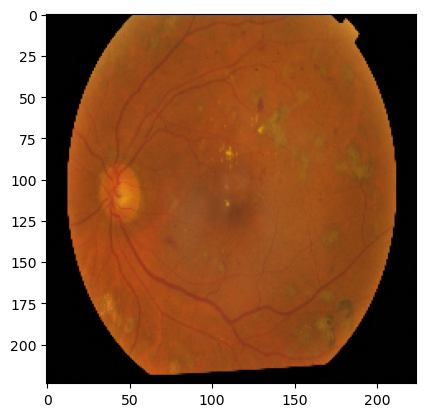

In [12]:
prediction(r'/Users/Sarmita Majumdar/Desktop/SMit_App/WebApp-Diabetic-Retino/test/DR/6d259b5b4c76.png')

1/1 [==============================] - 0s 201ms/step
DR


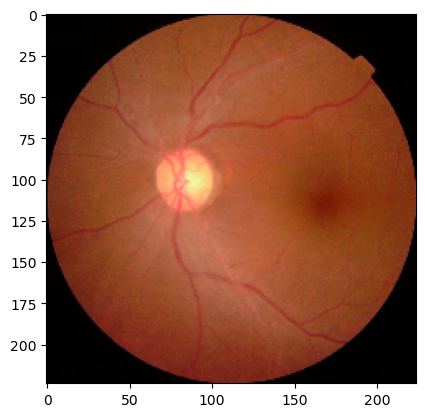

In [13]:
prediction(r'/Users/Sarmita Majumdar/Desktop/SMit_App/WebApp-Diabetic-Retino/test/No_DR/191cf5668f33.png')

1/1 [==============================] - 0s 185ms/step
DR


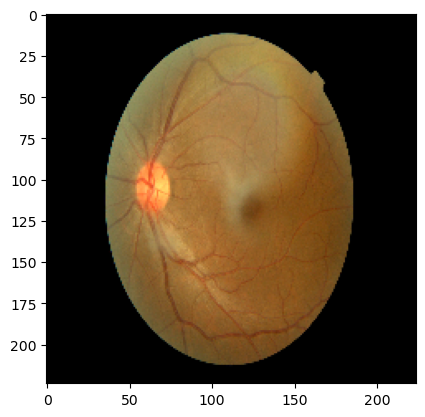

In [14]:
prediction(r'/Users/Sarmita Majumdar/Desktop/SMit/WebApp-Diabetic-Retino/test/No_DR/263d8851e33b.png')